### This script includes the following points:






1. Import the data
2. Memory optimization
3. Create a sample Data
4. Key Question 1: What are the busiest days of the week and hours of the day in terms of orders?
5. Key Question 2: Are there particular times of the day when people spend the most money?
6. Key Question 3: Instacart has a lot of products with different price tags. Can simpler price range groupings be used to help marketing and sales direct their efforts?
7. Key Question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.
8. Key Question 5: What’s the distribution among users in regards to their brand loyalty and are there differences in ordering habits based on a customer’s loyalty status?
9. Key Question 6: Are there differences in ordering habits based on a customer’s region?
10. Key Question 7: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Poory\OneDrive\Desktop\project\Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final3.pkl'))

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404857
Data columns (total 40 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                int32   
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   last_order_days        float16 
 6   first_order            bool    
 7   product_id             int32   
 8   add_to_cart_order      int32   
 9   reordered              int8    
 10  product_name           object  
 11  aisle_id               int32   
 12  department_id          int32   
 13  prices                 float32 
 14  price_range            category
 15  busiest_day            category
 16  busiest_days           category
 17  busiest_period_of_day  category
 18  max_order              int8    
 19  loyalty_flag           category
 20  avg_spent              float32 
 21  spending_flag          category
 2

### Change some columns data type to optimize memory

In [7]:
df['region'] = df['region'].astype('category')
df['activity_flag'] = df['activity_flag'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['dep_group'] = df['dep_group'].astype('category')
df['customer_prf'] = df['customer_prf'].astype('category')
df['inc_group'] = df['inc_group'].astype('category')
df['income_prf'] = df['income_prf'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404857
Data columns (total 40 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                int32   
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   last_order_days        float16 
 6   first_order            bool    
 7   product_id             int32   
 8   add_to_cart_order      int32   
 9   reordered              int8    
 10  product_name           object  
 11  aisle_id               int32   
 12  department_id          int32   
 13  prices                 float32 
 14  price_range            category
 15  busiest_day            category
 16  busiest_days           category
 17  busiest_period_of_day  category
 18  max_order              int8    
 19  loyalty_flag           category
 20  avg_spent              float32 
 21  spending_flag          category
 2

### Create a sample Data

In [8]:
# creating a list holding True/False values to the test np.random.rand() <= 0.8
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.8

# store 80 % of the sample in big data frame
big = df[dev]

# store 20 % of the sample in small data frame
small = df[~dev]

len(df) == len(small) + len(big)

True

In [9]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


#### Key Question 1: What are the busiest days of the week and hours of the day in terms of orders?

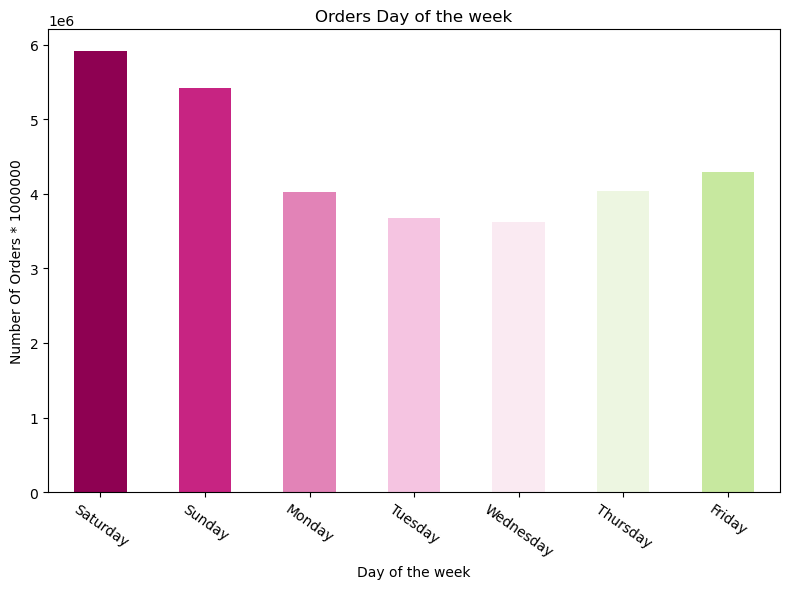

In [10]:
plt.figure(figsize=(8,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 10))
desired_order = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]

bar_days = df['orders_day'].value_counts(dropna=False).reindex(desired_order).plot.bar(color=colors)
plt.title('Orders Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number Of Orders * 1000000')

plt.xticks(rotation=-35)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_days.png'))
plt.show()

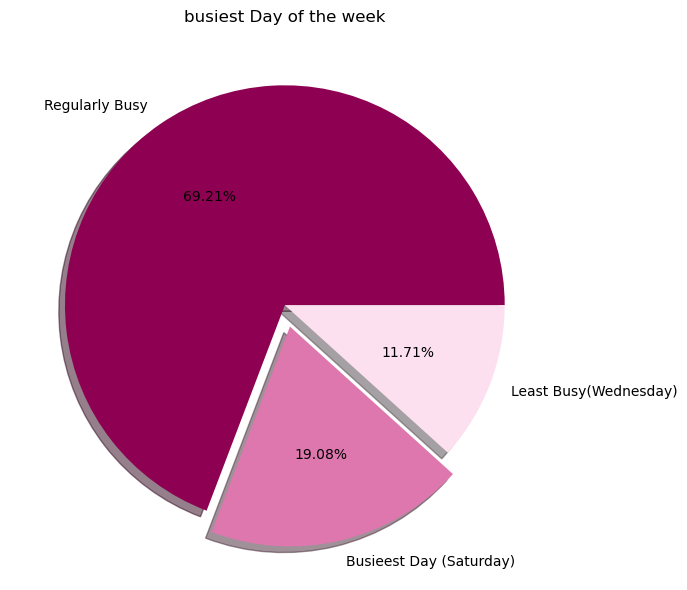

In [11]:
plt.figure(figsize=(8,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['busiest_day'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, explode=[0,0.1,0],
                                                                labels=['Regularly Busy','Busieest Day (Saturday)','Least Busy(Wednesday)'])
plt.title('busiest Day of the week')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_daysofweek.png'))
plt.show()

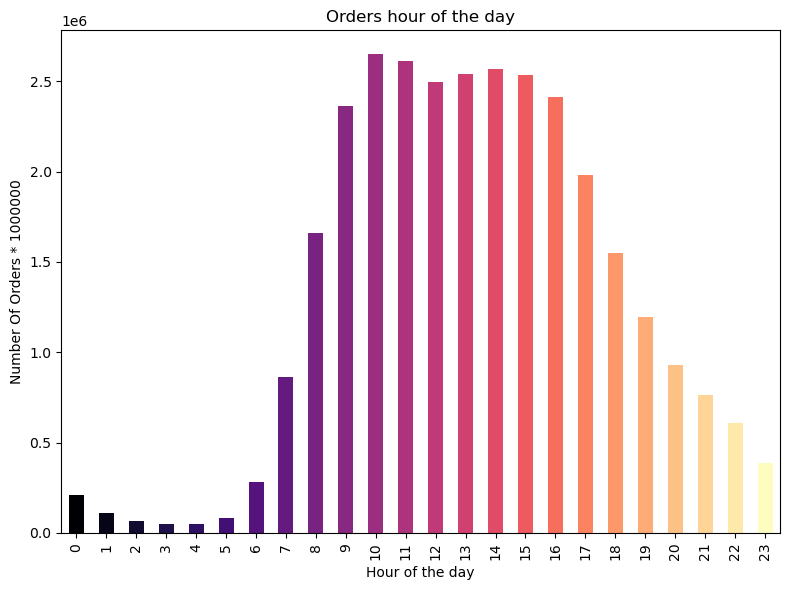

In [12]:
plt.figure(figsize=(8,6))
colors = plt.cm.magma(np.linspace(0, 1, 24))

bar_days = df['order_hour_of_day'].value_counts(dropna=False).sort_index().plot.bar(color=colors)
plt.title('Orders hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number Of Orders * 1000000')

#plt.xticks(rotation=-35)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hours.png'))
plt.show()

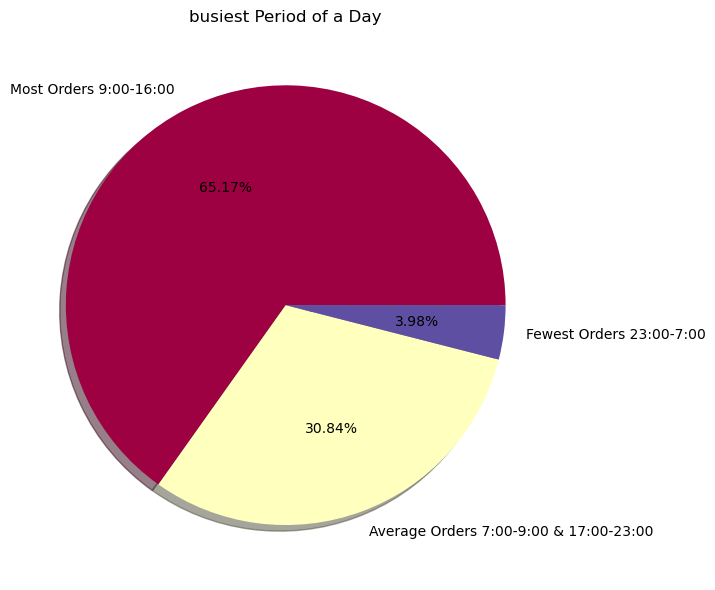

In [13]:
plt.figure(figsize=(8,6))
colors = plt.cm.Spectral(np.linspace(0, 1, 3))

pie_days = df['busiest_period_of_day'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, explode=[0,0,0],
                                   labels=['Most Orders 9:00-16:00','Average Orders 7:00-9:00 & 17:00-23:00','Fewest Orders 23:00-7:00'])
plt.title('busiest Period of a Day')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_HoursofDay.png'))
plt.show()

### Key Question 2: Are there particular times of the day when people spend the most money?

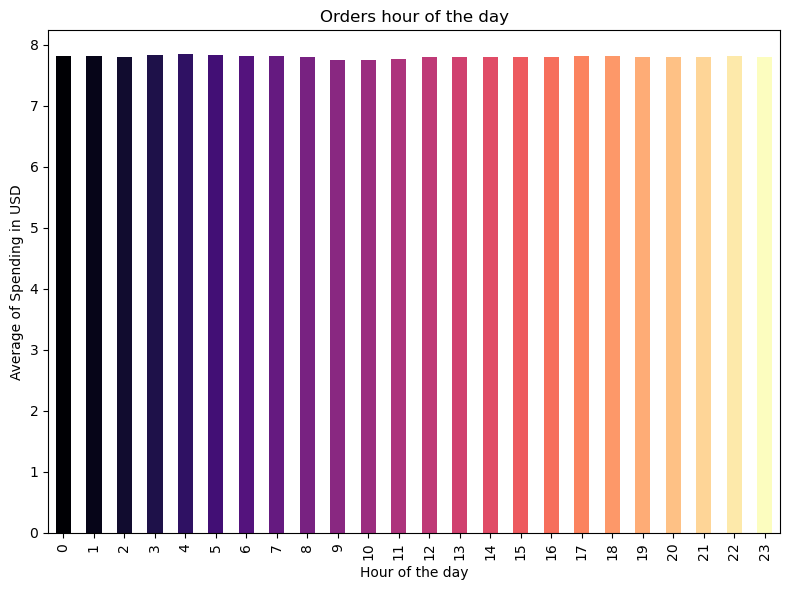

In [14]:
plt.figure(figsize=(8,6))
colors = plt.cm.magma(np.linspace(0, 1, 24))

bar_hours_pr = df.groupby('order_hour_of_day')['prices'].mean().plot.bar(color=colors)
plt.title('Orders hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Average of Spending in USD')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hours_spend.png'))
plt.show()

In [15]:
df_line = small[['order_hour_of_day','prices']]

C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


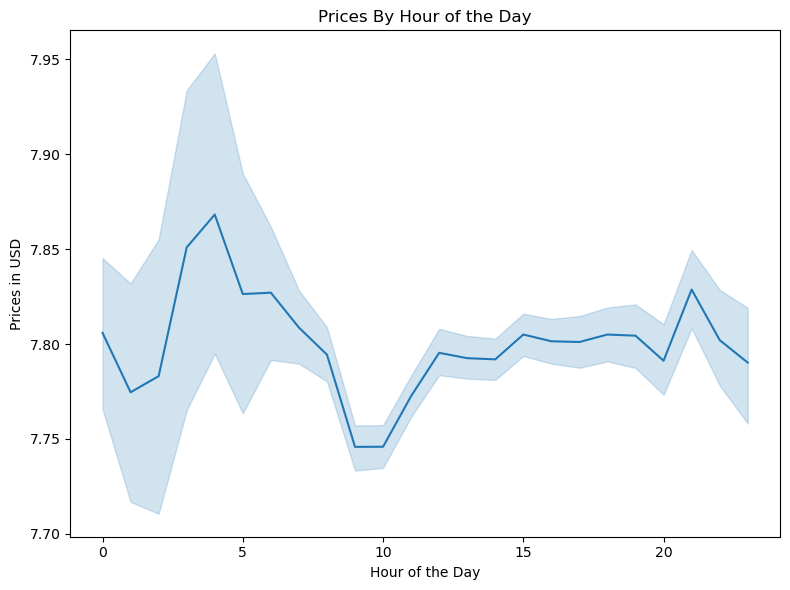

In [16]:
plt.figure(figsize=(8,6))

# Plot the line chart
sns.lineplot(data = df_line, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices By Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices in USD')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hours_price.png'))
plt.show()

### Key Question 3: Instacart has a lot of products with different price tags. Can simpler price range groupings be used to help marketing and sales direct their efforts?

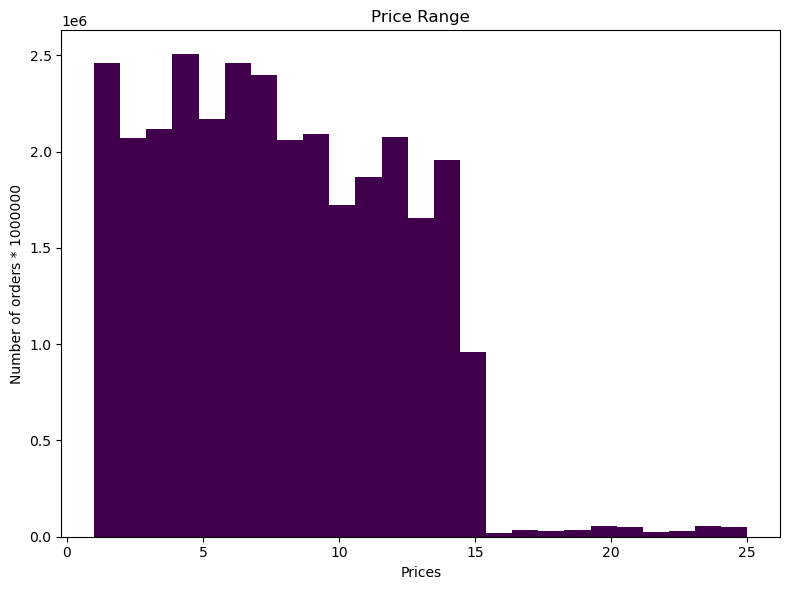

In [17]:
plt.figure(figsize=(8,6))
colors = plt.cm.PRGn(np.linspace(0, 1, 1))

hist_price = df['prices'].plot.hist(bins=25, color=colors)
plt.title('Price Range')
plt.xlabel('Prices')
plt.ylabel('Number of orders * 1000000')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))
plt.show()

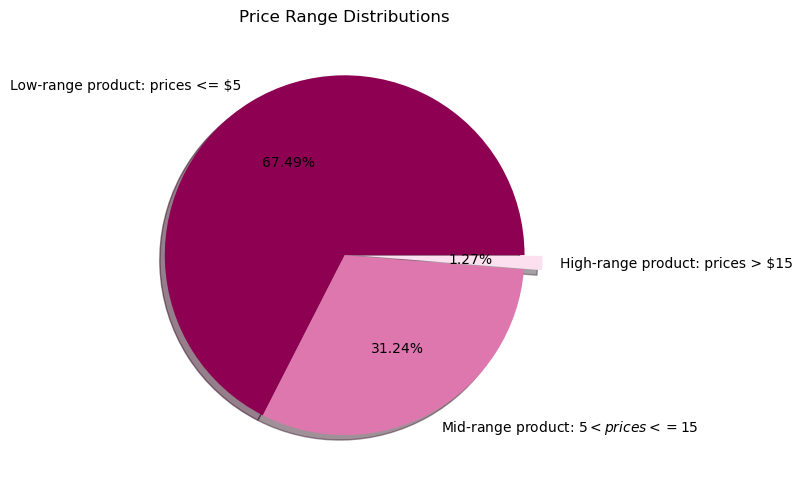

In [18]:
plt.figure(figsize=(8,5))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['price_range'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, explode=[0,0,0.1],
                                   labels=['Low-range product: prices <= $5','Mid-range product: $5 < prices <= $15','High-range product: prices > $15'])
plt.title('Price Range Distributions')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))
plt.show()

In [19]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


In [20]:
df['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: count, dtype: int64

### Key Question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

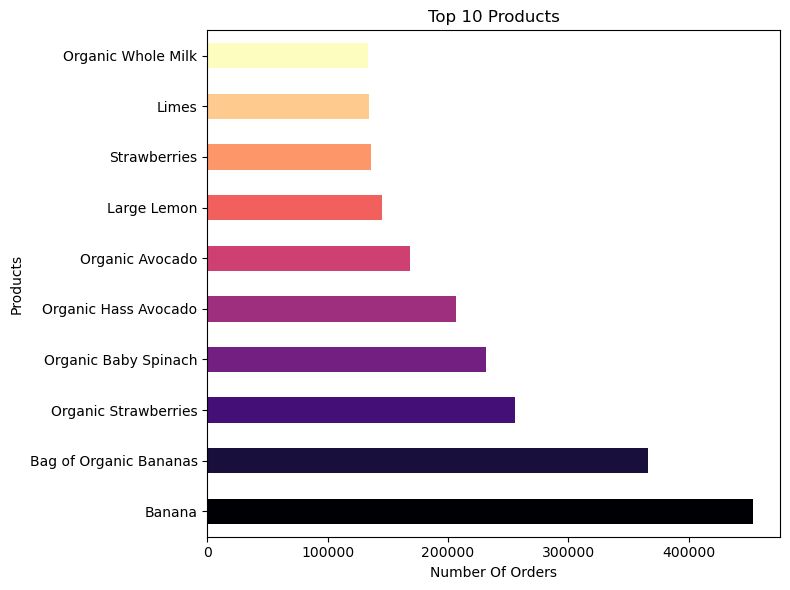

In [21]:
plt.figure(figsize=(8,6))
colors = plt.cm.magma(np.linspace(0, 1, 10))

bar_days = df['product_name'].value_counts(dropna=False).head(10).plot.barh(color=colors)
plt.title('Top 10 Products')
plt.xlabel('Number Of Orders')
plt.ylabel('Products')

#plt.xticks(rotation=-35)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pro.png'))
plt.show()

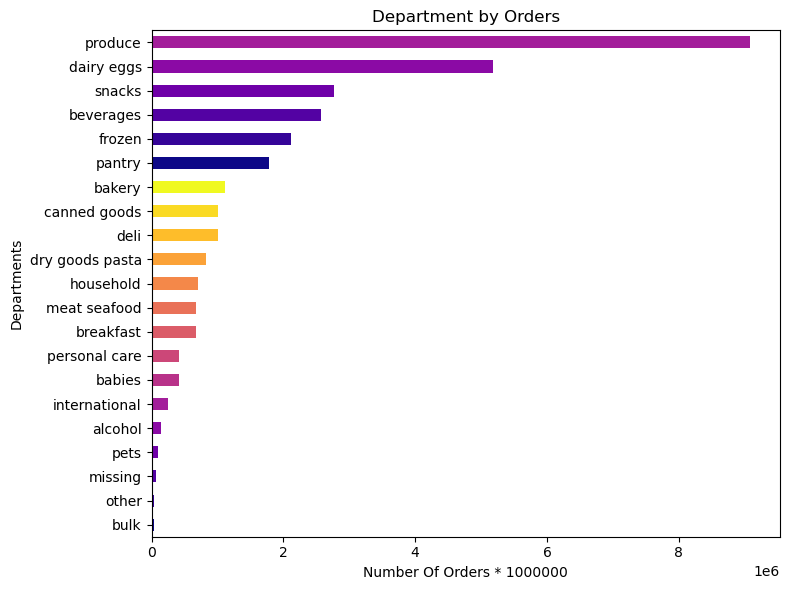

In [22]:
plt.figure(figsize=(8,6))
colors = plt.cm.plasma(np.linspace(0, 1, 15))

bar_Dep = df['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=colors)
plt.title('Department by Orders')
plt.xlabel('Number Of Orders * 1000000')
plt.ylabel('Departments')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep.png'))
plt.show()

In [23]:
df['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [24]:
df['dep_group'].value_counts(dropna=False)

dep_group
Fresh Food                   18056801
Non-Perishable_Food          10746900
Household & Personal_Care     1124163
Miscellaneous                  799013
Alcohol consumer               144627
Pet Owner                       93060
Name: count, dtype: int64

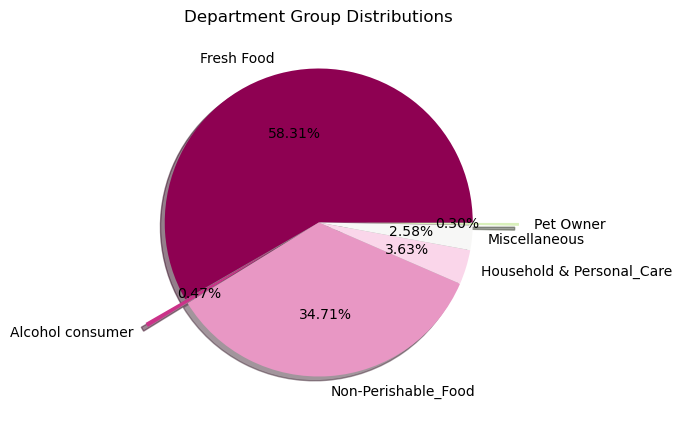

In [25]:
plt.figure(figsize=(8,5))
colors = plt.cm.PiYG(np.linspace(0, 1, 9))
desired_index = ['Fresh Food', 'Alcohol consumer', 'Non-Perishable_Food', 'Household & Personal_Care', 'Miscellaneous', 'Pet Owner']
pie_days = df['dep_group'].value_counts(dropna=False).reindex(desired_index).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, 
                                                              explode=[0,0.3,0,0,0,0.3])
                                   #labels=['Low-range product: prices <= $5','Mid-range product: $5 < prices <= $15','High-range product: prices > $15'])
plt.title('Department Group Distributions')
plt.ylabel('')
#plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dep_gp.png'))
plt.show()

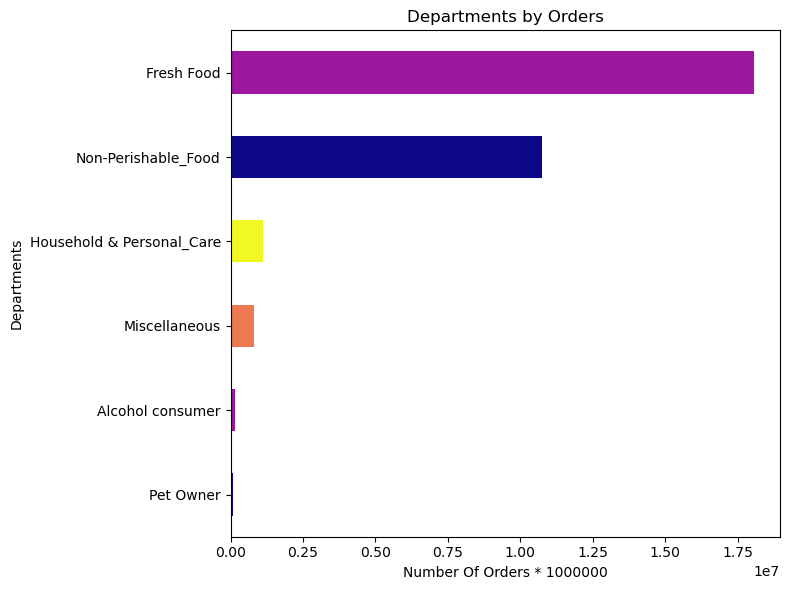

In [26]:
plt.figure(figsize=(8,6))
colors = plt.cm.plasma(np.linspace(0, 1, 4))

bar_Dep = df['dep_group'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=colors)
plt.title('Departments by Orders')
plt.xlabel('Number Of Orders * 1000000')
plt.ylabel('Departments')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_gp.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\1299443781.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['department', 'dep_group']).size().unstack(fill_value=0)


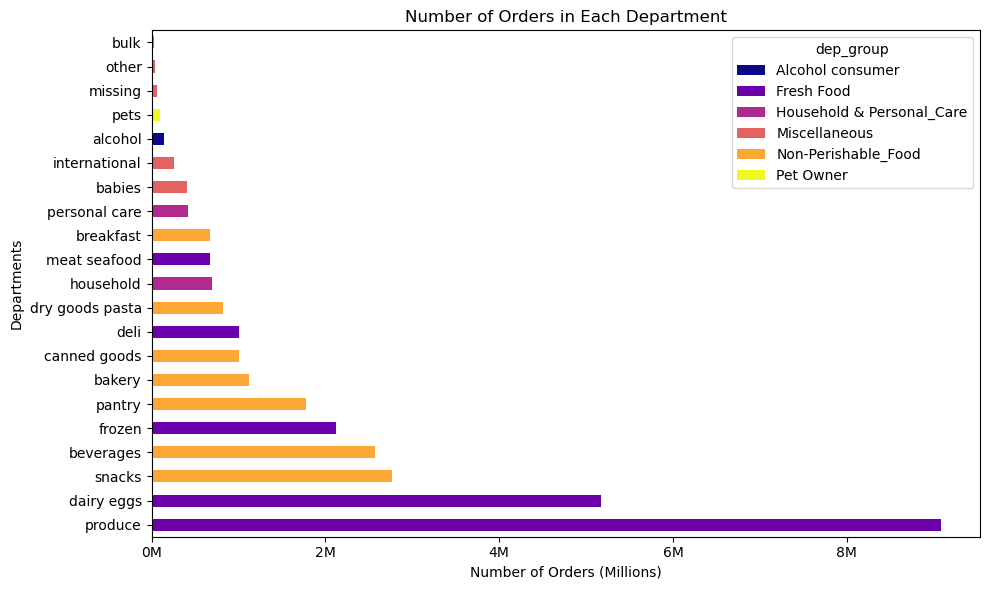

In [27]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['department', 'dep_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Departments')
ax.set_title('Number of Orders in Each Department')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_dep_dep.png'))
plt.show()

### Key Question 5: What’s the distribution among users in regards to their brand loyalty and are there differences in ordering habits based on a customer’s loyalty status? 

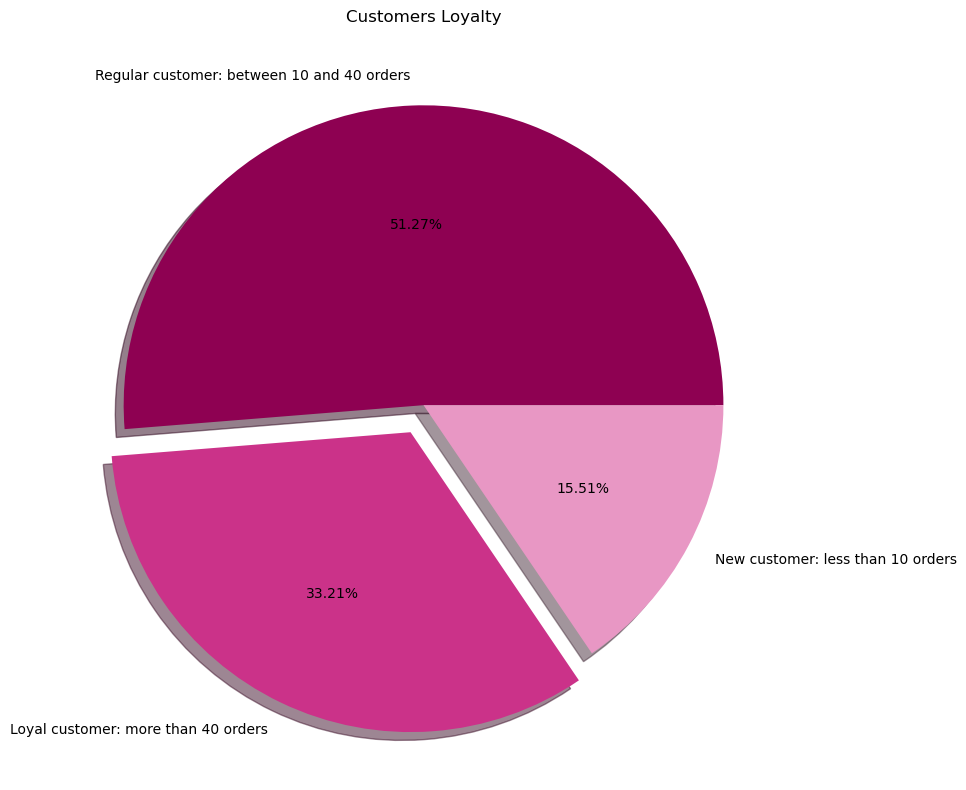

In [28]:
plt.figure(figsize=(10,8))
colors = plt.cm.PiYG(np.linspace(0, 1, 9))

pie_days = df['loyalty_flag'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, explode=[0,0.1,0], 
           labels=['Regular customer: between 10 and 40 orders', 'Loyal customer: more than 40 orders', 'New customer: less than 10 orders'])
plt.title('Customers Loyalty')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_Loyalty.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\2189889743.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['loyalty_flag', 'dep_group']).size().unstack(fill_value=0)


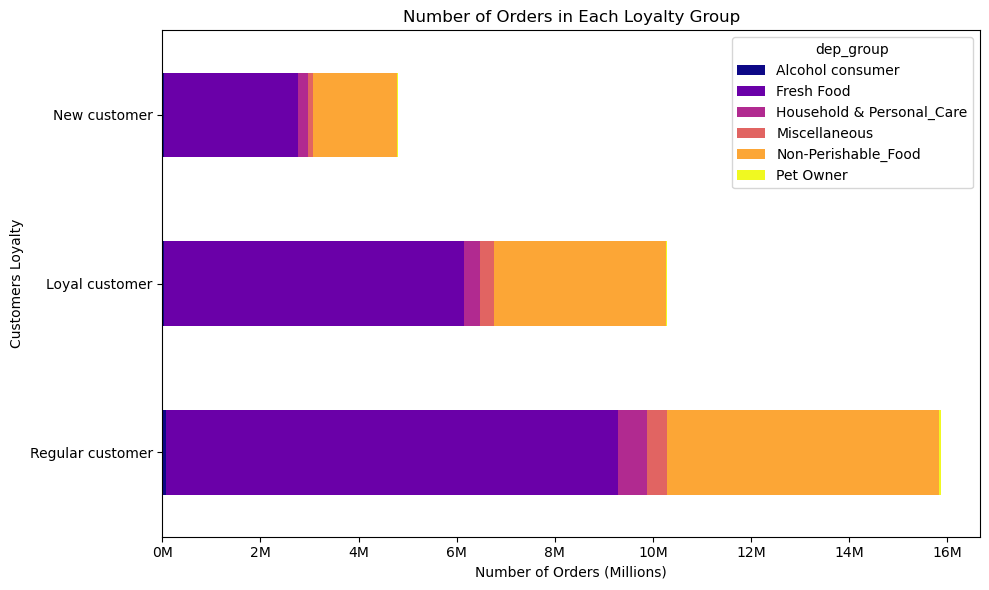

In [29]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['loyalty_flag', 'dep_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customers Loyalty')
ax.set_title('Number of Orders in Each Loyalty Group')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_dep_loy.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\2932597813.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['loyalty_flag', 'orders_day']).size().unstack(fill_value=0)


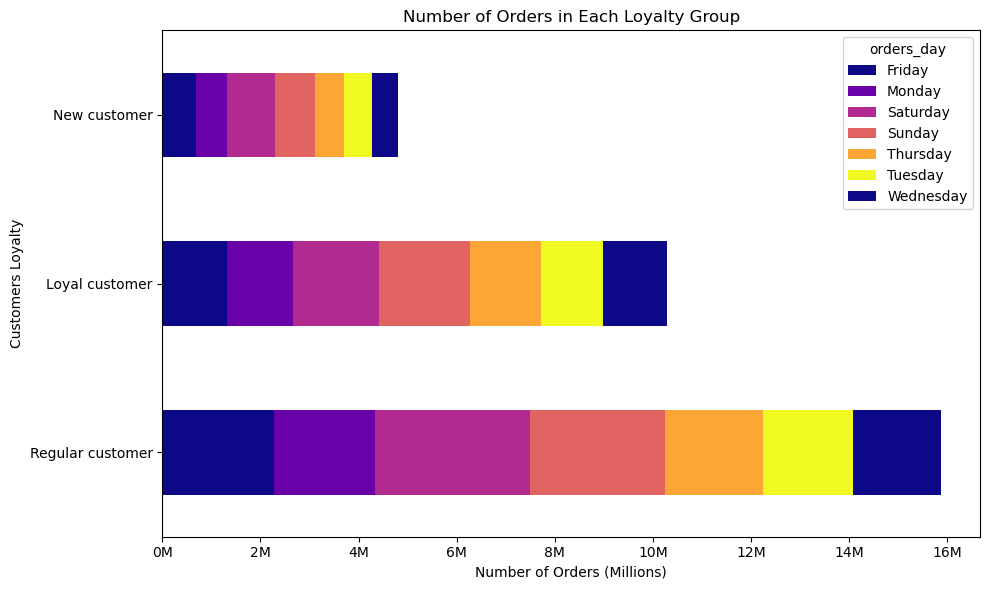

In [30]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['loyalty_flag', 'orders_day']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customers Loyalty')
ax.set_title('Number of Orders in Each Loyalty Group')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_day_loy.png'))
plt.show()

In [31]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\2184961016.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['loyalty_flag', 'frequency_flag']).size().unstack(fill_value=0)


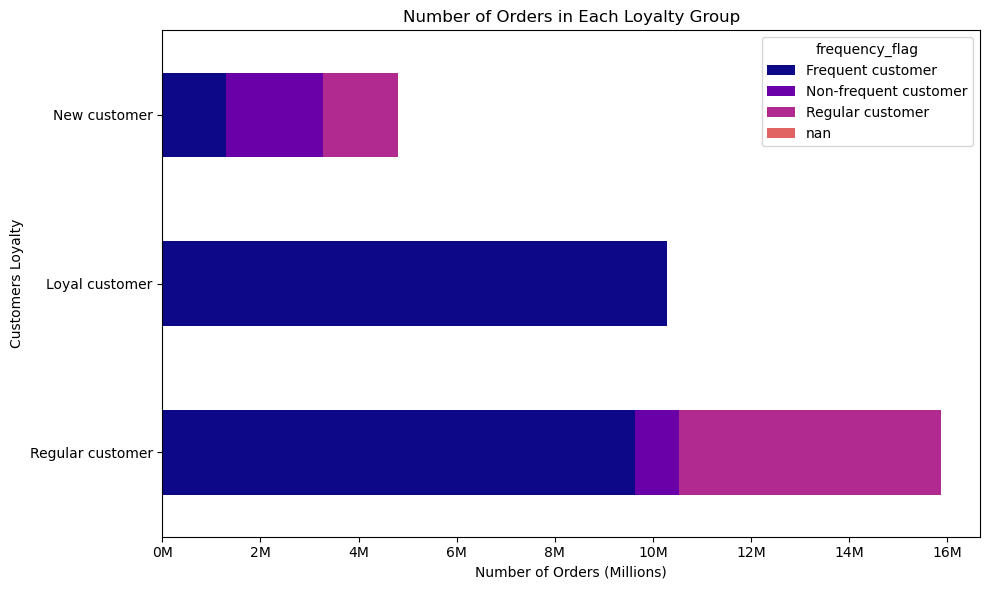

In [32]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by customer_profile and region, count the number of orders
grouped = df.groupby(['loyalty_flag', 'frequency_flag']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Customers Loyalty')
ax.set_title('Number of Orders in Each Loyalty Group')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_freq_loy.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\1023579415.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q7a = df.groupby('loyalty_flag').agg({'avg_spent':'mean', 'order_freq_med':'mean'})


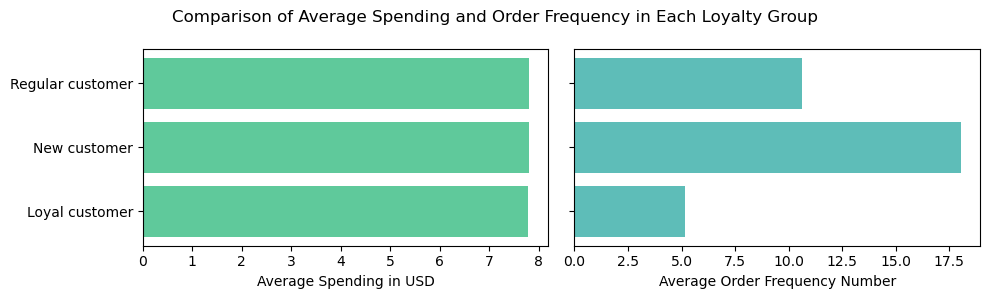

In [33]:
# Group by 'loyalty_flag' and calculate the mean of 'avg_spent' and 'order_freq_med'
df_q7a = df.groupby('loyalty_flag').agg({'avg_spent':'mean', 'order_freq_med':'mean'})

# Get customer profiles as a list
customer_loyalty_flag = df_q7a.index.tolist()

# Create a figure and axes with shared y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3), sharey=True)

# Plot average spending for each customer profile
ax1.barh(customer_loyalty_flag, df_q7a['avg_spent'], color='#1bb371', alpha=0.7)
ax1.set_xlabel('Average Spending in USD')


# Plot order frequency for each customer profile
ax2.barh(customer_loyalty_flag, df_q7a['order_freq_med'], color='#1aa19a', alpha=0.7)
ax2.set_xlabel('Average Order Frequency Number')


# Add suptitle
fig.suptitle('Comparison of Average Spending and Order Frequency in Each Loyalty Group')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_comp_spending_frq_Loyalty.png'))
plt.show()

### Key Question 6: Are there differences in ordering habits based on a customer’s region?

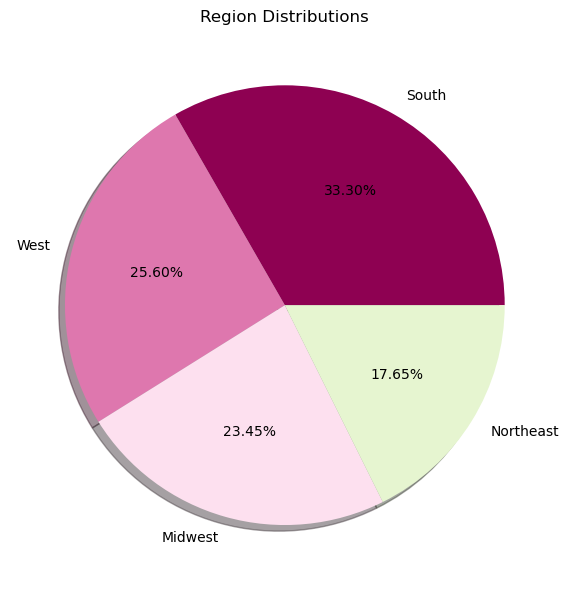

In [34]:
plt.figure(figsize=(8,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['region'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True )
plt.title('Region Distributions')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_region.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\154850339.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q7b = df.groupby('region').agg({'avg_spent':'mean', 'order_freq_med':'mean'})


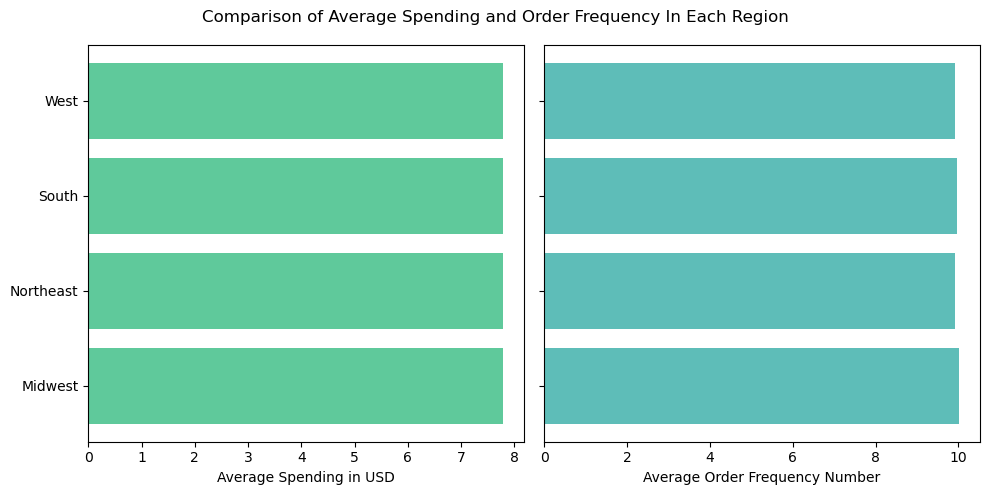

In [35]:
# Group by 'region' and calculate the mean of 'avg_spent' and 'order_freq_med'
df_q7b = df.groupby('region').agg({'avg_spent':'mean', 'order_freq_med':'mean'})

# Get customer profiles as a list
customer_profiles = df_q7b.index.tolist()

# Create a figure and axes with shared y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# Plot average spending for each customer profile
ax1.barh(customer_profiles, df_q7b['avg_spent'], color='#1bb371', alpha=0.7)
ax1.set_xlabel('Average Spending in USD')


# Plot order frequency for each customer profile
ax2.barh(customer_profiles, df_q7b['order_freq_med'], color='#1aa19a', alpha=0.7)
ax2.set_xlabel('Average Order Frequency Number')


# Add suptitle
fig.suptitle('Comparison of Average Spending and Order Frequency In Each Region')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bars_reg_spending_freq.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\1108937390.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['region', 'loyalty_flag']).size().unstack(fill_value=0)


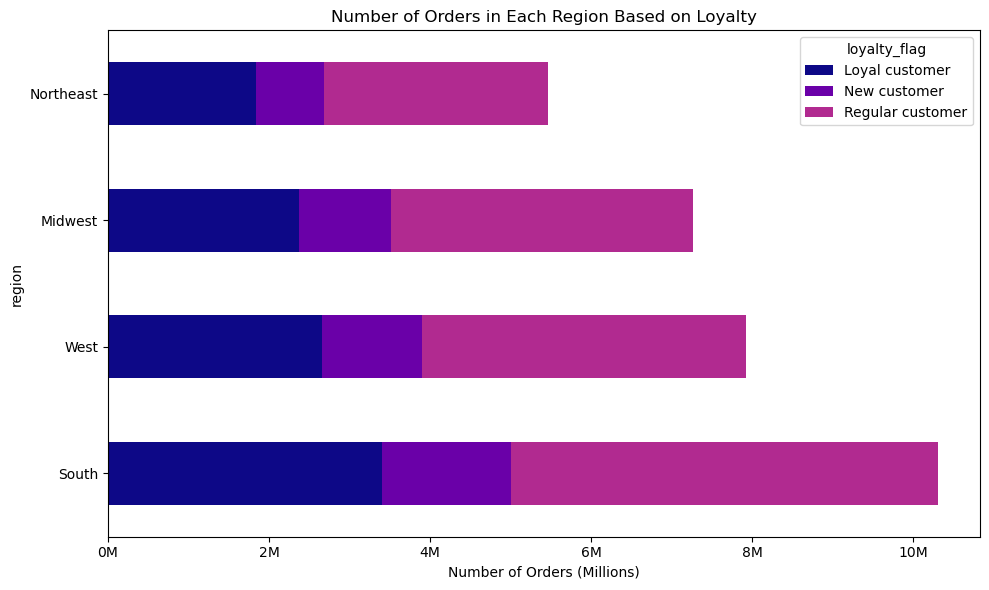

In [36]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by region and Loyalty_falg , count the number of orders
grouped = df.groupby(['region', 'loyalty_flag']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('region')
ax.set_title('Number of Orders in Each Region Based on Loyalty')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_reg_loy.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\2054275322.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['region', 'dep_group']).size().unstack(fill_value=0)


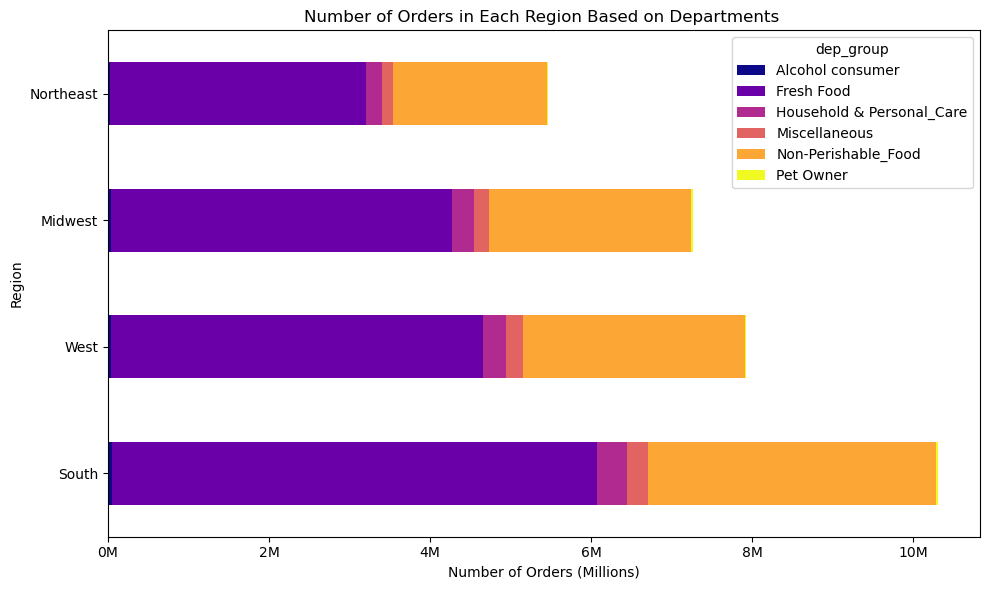

In [37]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 6))

# Group by region and dep_group, count the number of orders
grouped = df.groupby(['region', 'dep_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Region')
ax.set_title('Number of Orders in Each Region Based on Departments ')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_reg_dep.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\291980756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['region', 'orders_day']).size().unstack(fill_value=0)


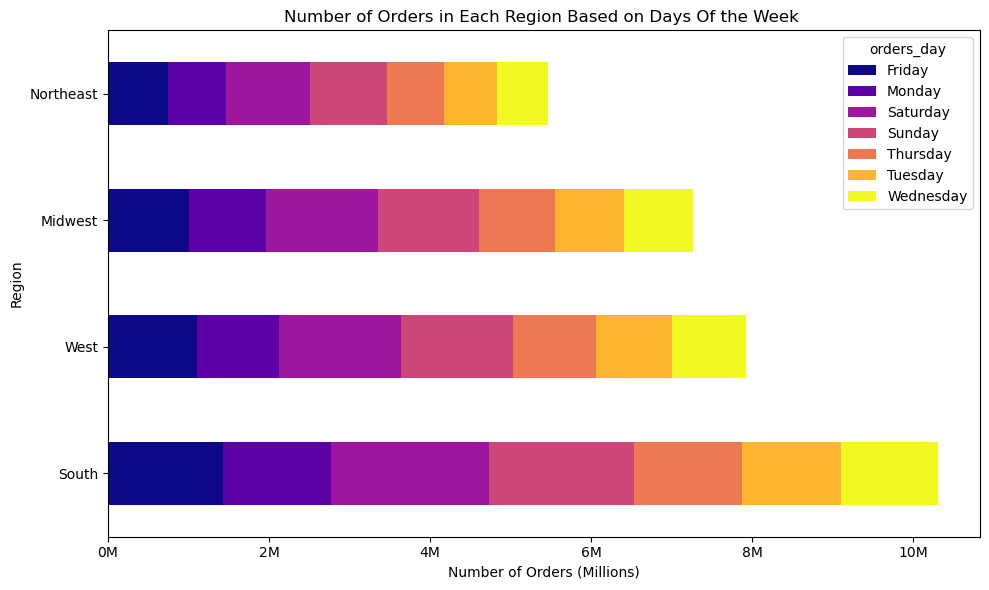

In [38]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 7))

# Group by region and orders_day, count the number of orders
grouped = df.groupby(['region', 'orders_day']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Region')
ax.set_title('Number of Orders in Each Region Based on Days Of the Week ')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_reg_day.png'))
plt.show()

In [39]:
df.groupby('region').agg({'avg_spent':['mean','max','median'], 'order_freq_med':['mean','max','median']})

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\1740860294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('region').agg({'avg_spent':['mean','max','median'], 'order_freq_med':['mean','max','median']})


avg_spent                      order_freq_med             
               mean        max    median           mean   max median
region                                                              
Midwest    7.793360  15.706667  7.816340      10.019932  30.0    8.0
Northeast  7.782396  18.233334  7.801099       9.924985  30.0    7.0
South      7.795500  20.114286  7.819171       9.955835  30.0    7.0
West       7.791283  19.400000  7.810696       9.923485  30.0    7.0

In [40]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final4.pkl'))
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final4_small.pkl'))
big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final4_big.pkl'))

### Key Question 7: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [41]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,department,orders_day,region,activity_flag,age_group,dep_group,customer_prf,inc_group,income_prf
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,Monday,South,high-activity customers,Young Adults,Non-Perishable_Food,Married Young Adults With Child,Low Income,Married Low Income With Child
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,98,7,4.0,Low-range product,Regularly busy,Regularly busy,Most Orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Monday,Midwest,high-activity customers,Old Adults,Non-Perishable_Food,Single Old Adults W/O Child,Middle Income,Single Middle Income W/O Child


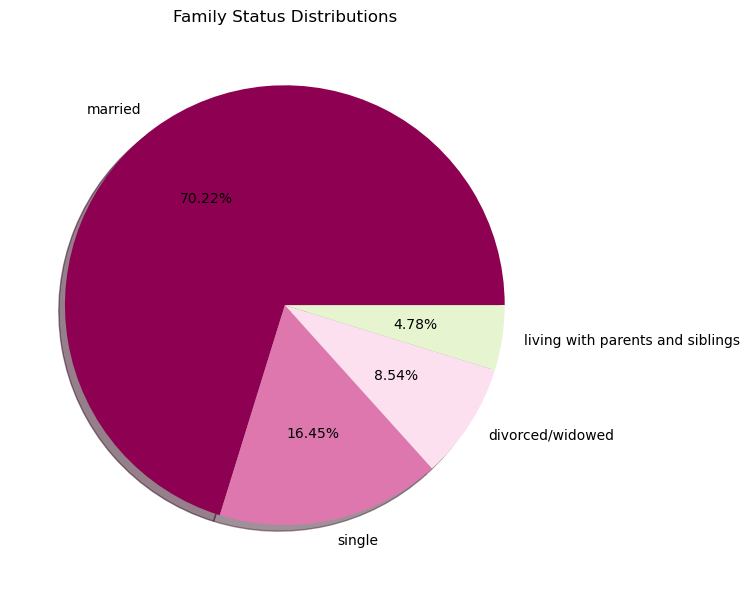

In [42]:
plt.figure(figsize=(8,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['fam_status'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True )
plt.title('Family Status Distributions')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_fam_sta.png'))
plt.show()

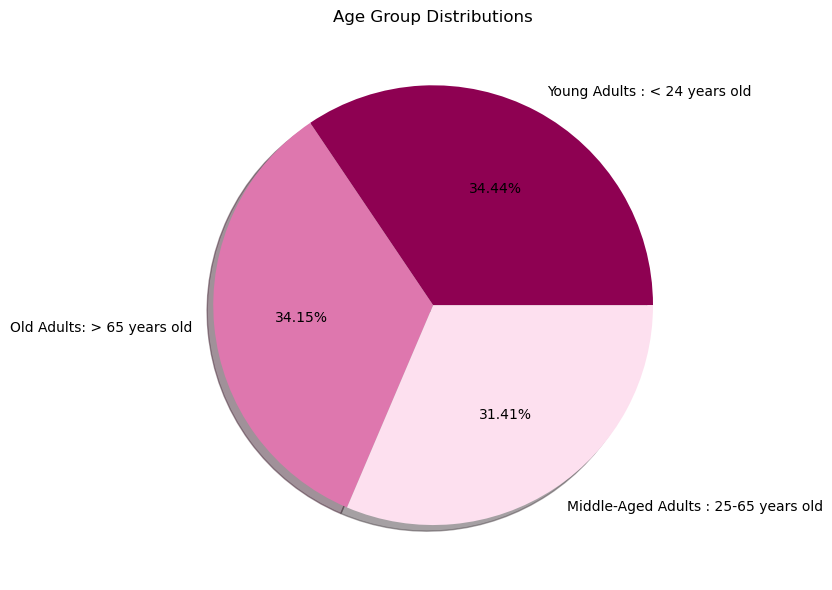

In [43]:
plt.figure(figsize=(10,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['age_group'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, labels = ['Young Adults : < 24 years old', 
                                                            'Old Adults: > 65 years old', 'Middle-Aged Adults : 25-65 years old'])
plt.title('Age Group Distributions')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_Age_Grp.png'))
plt.show()

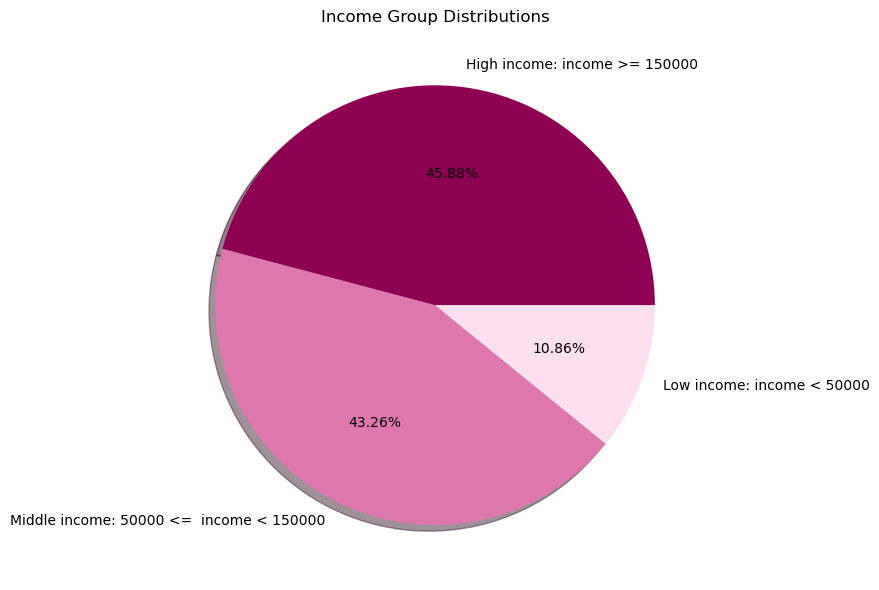

In [44]:
plt.figure(figsize=(10,6))
colors = plt.cm.PiYG(np.linspace(0, 1, 6))

pie_days = df['inc_group'].value_counts(dropna=False).plot.pie(colors=colors, autopct='%.2f%%', shadow=True, 
                                                               labels = ['High income: income >= 150000',
                                                                        'Middle income: 50000 <=  income < 150000',
                                                                        'Low income: income < 50000'] )
plt.title('Income Group Distributions')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_inc_Grp.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\2557689132.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'inc_group']).size().unstack(fill_value=0)


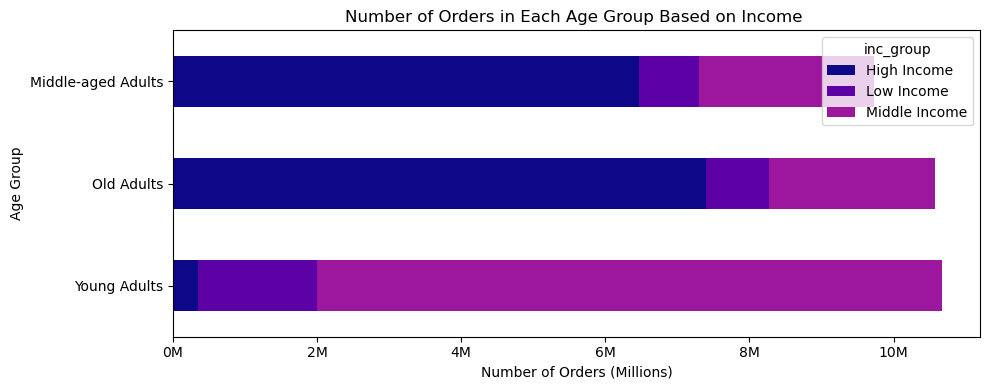

In [45]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 7))

# Group by region and orders_day, count the number of orders
grouped = df.groupby(['age_group', 'inc_group']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 4), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Age Group')
ax.set_title('Number of Orders in Each Age Group Based on Income ')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_age_inc.png'))
plt.show()

C:\Users\Poory\AppData\Local\Temp\ipykernel_20752\777282218.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['inc_group', 'fam_status']).size().unstack(fill_value=0)


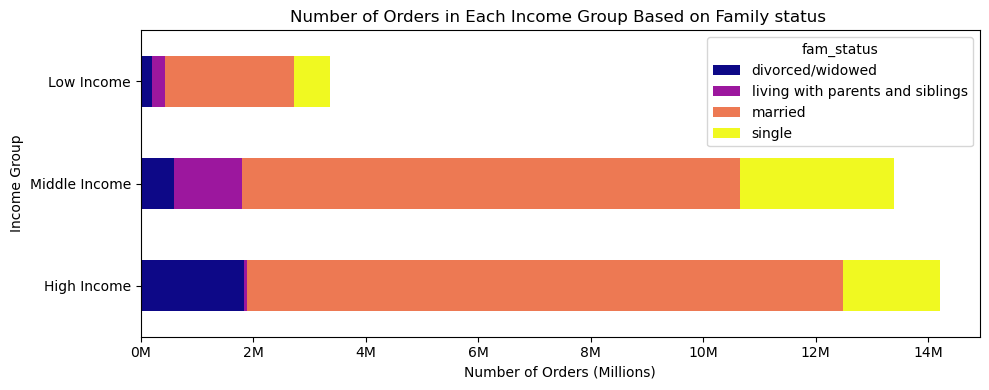

In [46]:
from matplotlib.ticker import FuncFormatter
colors = plt.cm.plasma(np.linspace(0, 1, 4))

# Group by region and orders_day, count the number of orders
grouped = df.groupby(['inc_group', 'fam_status']).size().unstack(fill_value=0)

# Sort the DataFrame by total number of orders after unstacking
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 4), color=colors)

# Add labels and title
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Income Group')
ax.set_title('Number of Orders in Each Income Group Based on Family status ')

# Format x-axis tick labels to display numbers in millions
formatter = FuncFormatter(lambda x, _: '{:,.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_inc_fam.png'))
plt.show()